In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares
from tqdm import tqdm

# Q1

In [2]:
def resolutionSystem1Euler(alpha,beta,delta,gamma,y0,z0,dt,N,t0=1900.0):
    "Cette fonctipn permet de resoudre le système (1)"
    temps = np.arange(0,N)*dt+t0 # si j'ai bien compris la question (dt=10/(N-1) pour 10 années)
    y = [y0]
    z = [z0]
    for i in range(N-1):
        y.append(y[i]+dt*y[i]*(alpha-beta*z[i]))
        z.append(z[i]+dt*z[i]*(delta*y[i]-gamma))

    return temps,np.array(y,dtype=np.float64),np.array(z,dtype=np.float64)

In [3]:
def h(y,z,alpha,beta,delta,gamma) :
    # print(y.dtype)
    # print(z.dtype)
    # print(y*(alpha-beta*z),z*(delta*y-gamma))
    return y*(alpha-beta*z),z*(delta*y-gamma)

In [4]:
def resolutionSystem1EulerRK4(alpha,beta,delta,gamma,y0,z0,dt,N,t0=1900.0):
    "Cette fonctipn permet de resoudre le système (1)"
    temps = np.arange(0,N)*dt+t0 # si j'ai bien compris la question (dt=10/(N-1) pour 10 années)
    y = [y0]
    z = [z0]
    for i in range(N-1):
        k1 = h(y[i],z[i],alpha,beta,delta,gamma)
        k2 = h(y[i]+0.5*dt*k1[0],z[i]+0.5*dt*k1[1],alpha,beta,delta,gamma)
        k3 = h(y[i]+0.5*dt*k2[0],z[i]+0.5*dt*k2[1],alpha,beta,delta,gamma)
        k4 = h(y[i]+dt*k3[0],z[i]+dt*k3[1],alpha,beta,delta,gamma)
        y.append(y[i]+(dt/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]))
        z.append(z[i]+(dt/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]))

    return temps,np.array(y,dtype=np.float64),np.array(z,dtype=np.float64)

# Q2

## pour calculer lambda et zeta celo les formules >>>>

In [5]:
mu=np.array([0.5,0.05,0.05,0.5])
std =np.array([0.2,0.02,0.02,0.2])
zeta = np.sqrt(np.log(1+(std**2)/mu**2))
lamb = np.log(mu)-(zeta**2)/2


In [6]:
Nsamples = 1000
alpha = np.random.lognormal(lamb[0],zeta[0],Nsamples)
beta = np.random.lognormal(lamb[1],zeta[1],Nsamples)
delta = np.random.lognormal(lamb[2],zeta[2],Nsamples)
gamma = np.random.lognormal(lamb[3],zeta[3],Nsamples)
y0 = np.random.lognormal(np.log(10),1,Nsamples)
z0 = np.random.lognormal(np.log(10),1,Nsamples)

In [7]:
N = 1000
dt = 20/(N-1) # pour trouver l'indice de l'année k=année/dt
solution = resolutionSystem1Euler(alpha,beta,delta,gamma,y0,z0,dt,N)

### t0=1900

In [8]:
bins = [x+ 0.5 for x in range(-1, 100)]

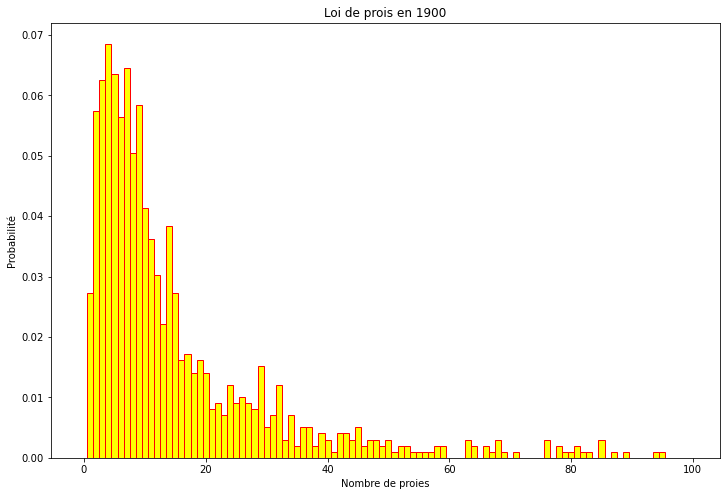

In [9]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(y0,  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de proies')
plt.ylabel('Probabilité')
plt.title('Loi de prois en 1900')
plt.show()

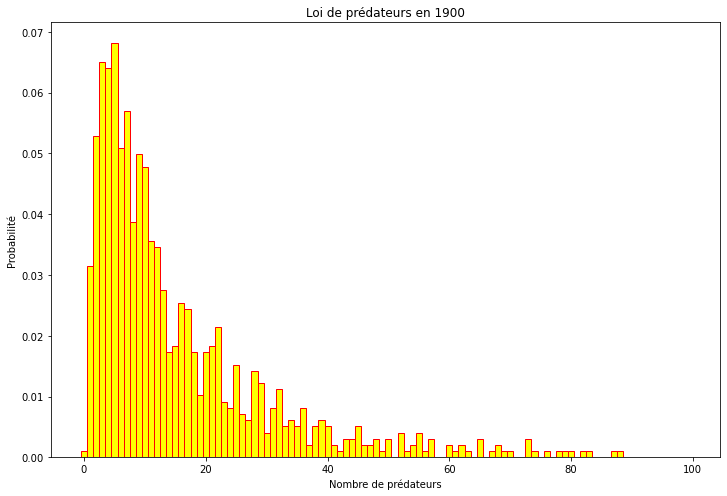

In [10]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(z0,  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de prédateurs')
plt.ylabel('Probabilité')
plt.title('Loi de prédateurs en 1900')
plt.show()

### t1=1901

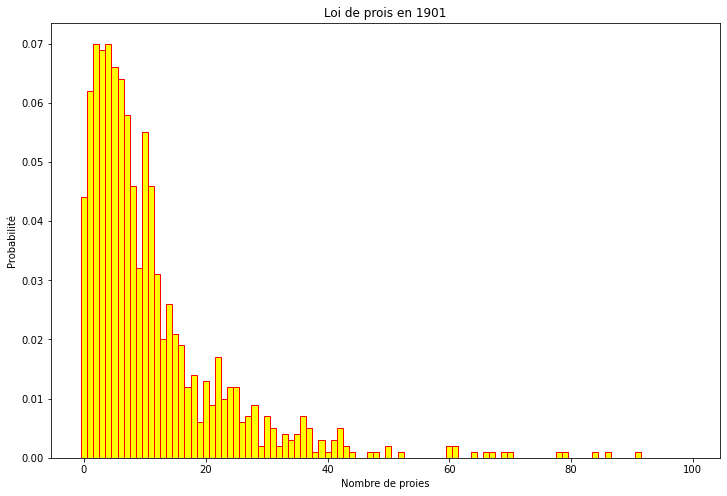

In [11]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(solution[1][int(1/dt)],  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de proies')
plt.ylabel('Probabilité')
plt.title('Loi de prois en 1901')
plt.show()

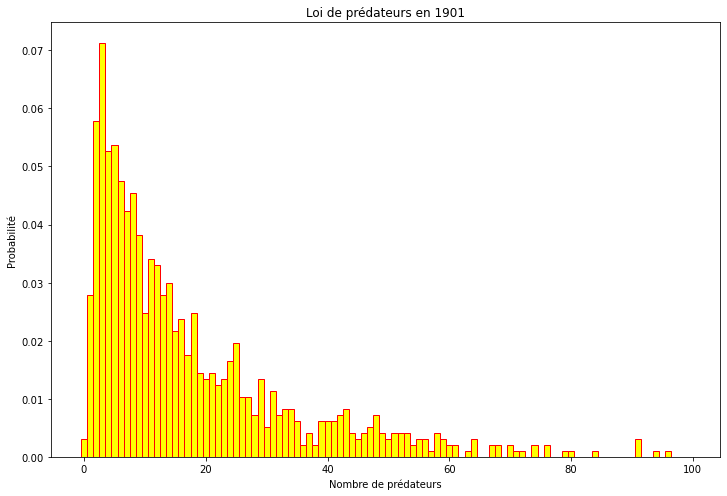

In [12]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(solution[2][int(1/dt)],  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de prédateurs')
plt.ylabel('Probabilité')
plt.title('Loi de prédateurs en 1901')
plt.show()

### t2=1920

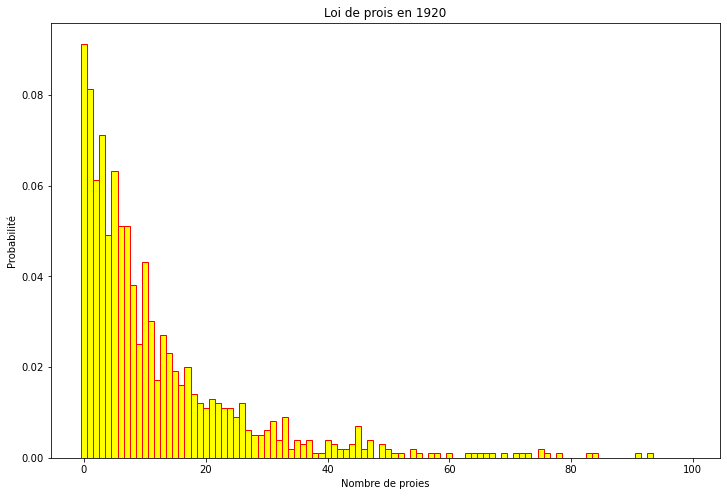

In [13]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(solution[1][-1],  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de proies')
plt.ylabel('Probabilité')
plt.title('Loi de prois en 1920')
plt.show()

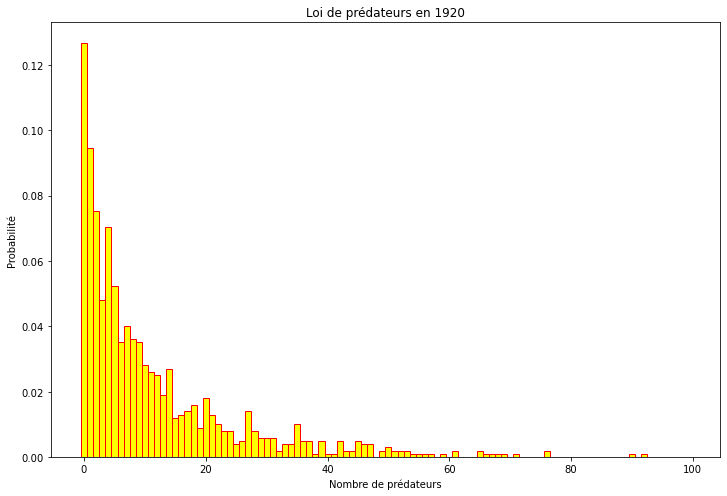

In [14]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(solution[2][-1],  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de prédateurs')
plt.ylabel('Probabilité')
plt.title('Loi de prédateurs en 1920')
plt.show()

### la solution moyenne de l'ED I=E(f(X)) ???

In [15]:
yto20 = [np.mean(l) for l in solution[1]]

In [16]:
zto20 = [np.mean(l) for l in solution[2]]

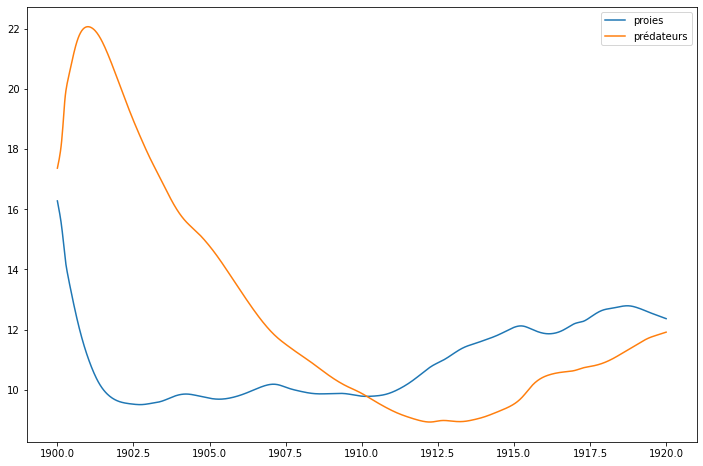

In [17]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.plot(solution[0],yto20, label ="proies")
plt.plot(solution[0],zto20, label ="prédateurs")
# plt.xlabel('Nombre de prédateurs')
# plt.ylabel('Probabilité')
# plt.title('Loi de prédateurs en 1920')
plt.legend()
plt.show()

## Q3

In [18]:
annee = [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,1920]
lievre = [30, 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22, 25.4, 27.1, 40.3, 57, 76.6, 52.3, 19.5, 11.2, 7.6, 14.6, 16.2, 24.7]
lynx = [4, 6.1, 9.8, 35.2, 59.4, 41.7, 19, 13, 8.3, 9.1, 7.4, 8, 12.3, 19.5, 45.7, 51.1, 29.7, 15.8, 9.7, 10.1, 8.6]

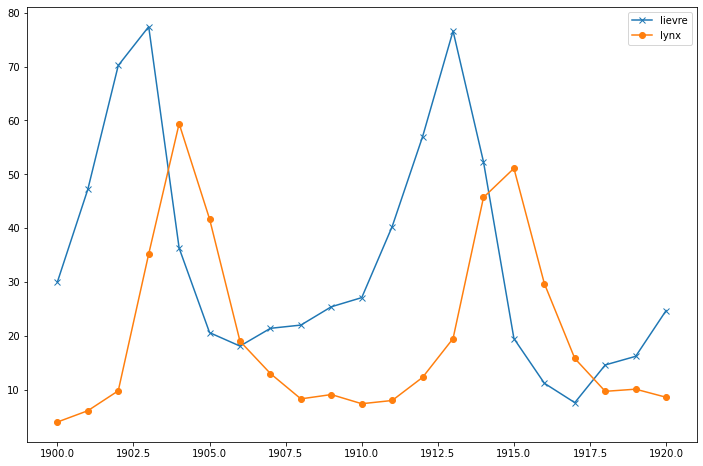

In [19]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.plot(annee,lievre,"-x", label ="lievre")
plt.plot(annee,lynx, "-o",label ="lynx")
plt.legend()
plt.show()

# 4.1 Calibration déterministe

## Q4

In [20]:
# callable
def epsilon(x,*args):
    temps,y,z = resolutionSystem1EulerRK4(x[0],x[1],x[2],x[3],x[4],x[5],args[0],args[1])
    dt = args[0]
    # print(temps[[int(k/dt) for k in range(21)]])
    ypred = y[[int(k/dt) for k in range(21)]]
    zpred = z[[int(k/dt) for k in range(21)]]
    yresidu = np.log(ypred)-np.log(args[2])
    zresidu = np.log(zpred)-np.log(args[3])
    eps = np.sum(yresidu**2)+np.sum(zresidu**2) # np.linalg.norm(objective)**2

    return eps #np.concatenate((yresidu,zresidu))


In [21]:
zeta = np.sqrt(np.log(1+(std**2)/mu**2))
lamb = np.log(mu)-(zeta**2)/2

In [22]:
x0 = [0.5,0.03,0.03,0.5,3,3]
args = (dt,N,lievre,lynx)
mean_normal = np.array([0.5, 0.05, 0.05, 0.5, np.log(10), np.log(10)])
mean_normal[:4]=lamb
std_normal = np.array([0.2, 0.02, 0.02, 0.2, 1, 1])
std_normal[:4]=zeta
min_bound = np.exp(mean_normal-2*std_normal)
max_bound = np.exp(mean_normal+2*std_normal)
bound = np.concatenate((min_bound, max_bound)).reshape((6,2), order='F')
print(bound)


[[2.14839611e-01 1.00315412e+00]
 [2.14839611e-02 1.00315412e-01]
 [2.14839611e-02 1.00315412e-01]
 [2.14839611e-01 1.00315412e+00]
 [1.35335283e+00 7.38905610e+01]
 [1.35335283e+00 7.38905610e+01]]


In [23]:
result = minimize(epsilon,x0,args=args,method="Nelder-Mead",bounds= bound) # "SLSQP","Powell"
# print(result)
print(result['fun'])
x = result['x']

2.021286011424579


In [25]:
print(result)

 final_simplex: (array([[5.39703884e-01, 2.71396739e-02, 2.36848743e-02, 7.95733950e-01,
        3.48229952e+01, 5.84850530e+00],
       [5.39703919e-01, 2.71396602e-02, 2.36848380e-02, 7.95733879e-01,
        3.48230905e+01, 5.84849559e+00],
       [5.39704979e-01, 2.71396699e-02, 2.36847935e-02, 7.95732625e-01,
        3.48230570e+01, 5.84850833e+00],
       [5.39706226e-01, 2.71398037e-02, 2.36847298e-02, 7.95730506e-01,
        3.48230478e+01, 5.84851000e+00],
       [5.39703788e-01, 2.71396864e-02, 2.36848465e-02, 7.95733605e-01,
        3.48230115e+01, 5.84850352e+00],
       [5.39704222e-01, 2.71396415e-02, 2.36848651e-02, 7.95734709e-01,
        3.48229466e+01, 5.84848711e+00],
       [5.39702952e-01, 2.71396178e-02, 2.36849536e-02, 7.95734822e-01,
        3.48230009e+01, 5.84848345e+00]]), array([2.02128601, 2.02128601, 2.02128601, 2.02128601, 2.02128601,
       2.02128601, 2.02128601]))
           fun: 2.021286011424579
       message: 'Optimization terminated successfully.'


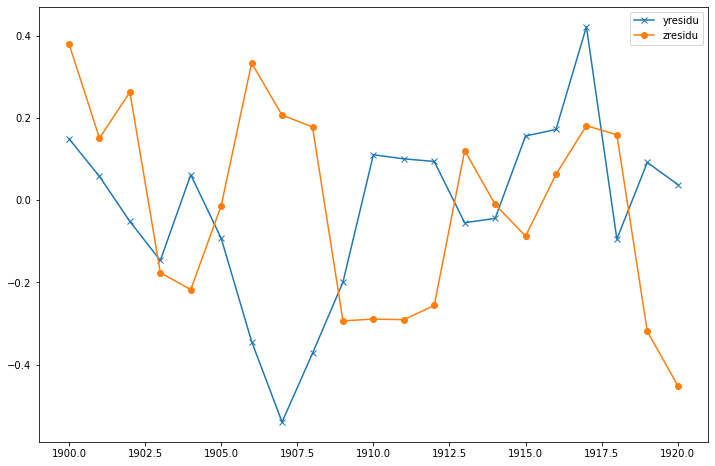

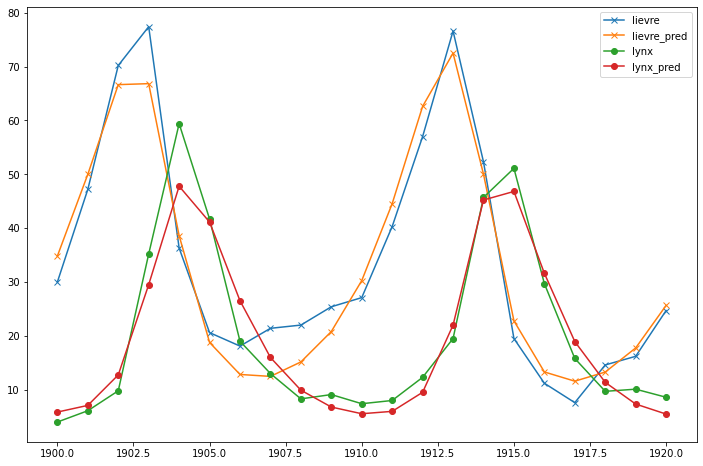

In [24]:
temps,y,z = resolutionSystem1Euler(x[0],x[1],x[2],x[3],x[4],x[5],args[0],args[1])
dt = args[0]
ypred = y[[int(k/dt) for k in range(21)]]
zpred = z[[int(k/dt) for k in range(21)]]
yresidu = np.log(ypred)-np.log(args[2])
zresidu = np.log(zpred)-np.log(args[3])

plt.figure(figsize=(12,8), facecolor='white')
plt.plot(annee,yresidu,"-x", label = "yresidu")
plt.plot(annee,zresidu, "-o",label = "zresidu")
plt.legend()
plt.show()


plt.figure(figsize=(12,8), facecolor='white')
plt.plot(annee,args[2],"-x", label = "lievre")
plt.plot(annee,ypred, "-x",label = "lievre_pred")
plt.plot(annee,args[3], "-o",label = "lynx")
plt.plot(annee,zpred,"-o",label = "lynx_pred")
plt.legend()
plt.show()